# Exercise 1 Part 1

The function is

$f(x_1,x_2) = (x_1^2 + 2x_2^2)^2$

The minimiser is

$(x_1,-x_1/2)$

and the minimum value is $0$

It has multiple minimas, and because of that, it is not a convex function.



For the function $g(x)$

The graph of the function will look be a line at points where the x-value belongs to our convex set $L$ and the remaining points go to inifinity.

So depending on the set $L$ our x-valued points may be discontinuous.

In case of discontinuities in the values of $x$, we will NOT obtain a convex set.

(Convexity criterion for $g(x)$ purely depends on the convex set $L$).

# Exercise 1 Part 2

For p value =  0.9
iterations =  9
minimiser =  [[-32]
 [ 16]]
minimum =  [0]

For p value =  0.8
iterations =  10
minimiser =  [[-12]
 [  6]]
minimum =  [0]

For p value =  0.75
iterations =  9
minimiser =  [[-62]
 [ 31]]
minimum =  [0]

For p value =  0.6
iterations =  10
minimiser =  [[-22]
 [ 11]]
minimum =  [0]

For p value =  0.5
iterations =  6
minimiser =  [[0]
 [0]]
minimum =  [0]

For p value =  0.4
iterations =  8
minimiser =  [[-52]
 [ 26]]
minimum =  [0]

For p value =  0.25
iterations =  11
minimiser =  [[-20]
 [ 10]]
minimum =  [0]

For p value =  0.1
iterations =  33
minimiser =  [[-40]
 [ 20]]
minimum =  [0]

For p value =  0.01
iterations =  73
minimiser =  [[0]
 [0]]
minimum =  [0]



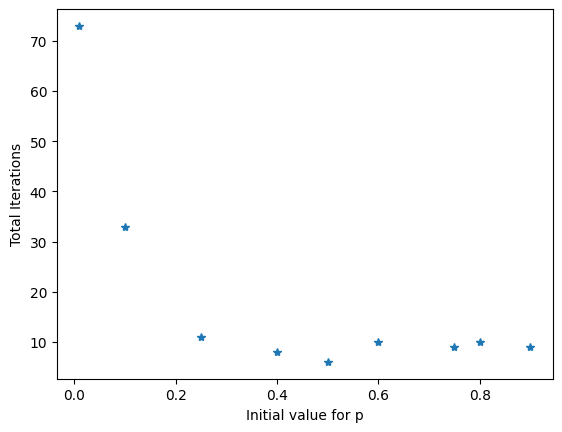

In [ ]:
#Exercise 1 Part 2 - coordinate descent with scaling

import numpy as np
import random
import matplotlib.pyplot as plt

#definig our function
def func(x):
    return x[0]**2 + 4*x[0]*x[1] + 4*x[1]**2

#defining our gradient
def grad(x):
    g = np.zeros((2,1))
    g[0][0] = 2*x[0] + 4*x[1]
    g[1][0] =  8*x[1] + 4*x[0]

    return g

#defining our matrix D
def D(x):
    h = np.zeros((2,2))
    h[0][0] = 1/2
    h[0][1] = 0
    h[1][0] = 0
    h[1][1] = 1/8

    return h

#choosing a random variable

def random_selector(n):
    r = random.randint(0,1)
    return r


#defining the norm calculation for the gradient

def norm(gradient): #here we are taking the gradient as an array type argument for our function

    return np.linalg.norm(gradient)


#now we shall define our descent with scaling algorithm

def coordinate_descent_with_scaling(x0, toler, p0):

    #starting with the given value of x initial
    x = np.zeros((2,1))
    x = x0

    #initialising some parameters
    g = grad(x)
    D_mat = D(x)
    L2 = norm(g)
    count = 0

    while(L2 > toler):

       #initialising line search parameters

        a0 = 1
        p = p0
        gamma = 0.5

        #initialising the direction parameter

        d =  - D_mat @ g

       #now the line search loop

        while (func(x + a0*d) > func(x) + gamma*a0*g.T@ d): # Check the RHS once, whether it is supposed to be g.T @ d or d.T @ d
            a0 = a0 * p


        #randomly choosing which value to change (either x1 or x2)
        r = random_selector(len(x))

        #updating values of x
        x[r] = x[r] + a0*d[r]

        #initialising new gradient and norm wrt to new x
        g = grad(x)
        L2 = norm(g)

        #and updating the count
        count = count + 1


    return count, x, func(x)



#now the portion to initialise everything and run the final code

toler = 0.00000000000001 #10^-12



#defining the start points for the backtracking algorithm
p0 = np.array([0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01])

#also creating list to append values to plot iterations vs a0
P = []
I_w = []


for i in range(len(p0)):

    p_init = p0[i]
    P.append(p_init)

    #initial value
    x0 = np.array([[1], [40]])


    iter_w, x_w, f_opt_w = coordinate_descent_with_scaling(x0, toler, p_init)

    print("For p value = ", p_init)

    print("iterations = ", iter_w)

    print("minimiser = ", x_w)

    print("minimum = ", f_opt_w)
    print()

    I_w.append(iter_w)

#plotting iterations vs p-val
plt.plot(P,I_w, '*')
plt.xlabel('Initial value for p')
plt.ylabel('Total Iterations')

plt.show()

We observe from here that...

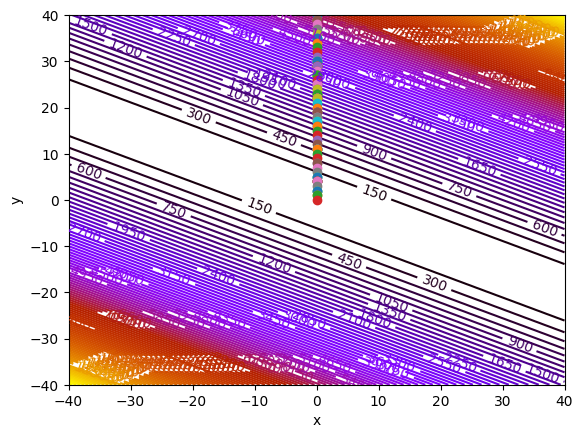

In [ ]:
#Exercise 1 Part 2 - plotting level sets and showing trajectory for p=0.01

import numpy as np
import random
import matplotlib.pyplot as plt

#definig our function
def func(x):
    return x[0]**2 + 4*x[0]*x[1] + 4*x[1]**2

#defining our gradient
def grad(x):
    g = np.zeros((2,1))
    g[0][0] = 2*x[0] + 4*x[1]
    g[1][0] =  8*x[1] + 4*x[0]

    return g

#defining our matrix D
def D(x):
    h = np.zeros((2,2))
    h[0][0] = 1/2
    h[0][1] = 0
    h[1][0] = 0
    h[1][1] = 1/8

    return h

#choosing a random variable

def random_selector(n):
    r = random.randint(0,1)
    return r


#defining the norm calculation for the gradient

def norm(gradient): #here we are taking the gradient as an array type argument for our function

    return np.linalg.norm(gradient)


#now we shall define our descent with scaling algorithm

def coordinate_descent_with_scaling(x0, toler):

    #starting with the given value of x initial
    x = np.zeros((2,1))
    x = x0

    #initialising some parameters
    g = grad(x)
    D_mat = D(x)
    L2 = norm(g)
    count = 0

    while(L2 > toler):

       #initialising line search parameters

        a0 = 1
        p = 0.01
        gamma = 0.5

        #initialising the direction parameter

        d =  - D_mat @ g

       #now the line search loop

        while (func(x + a0*d) > func(x) + gamma*a0*g.T@ d): # Check the RHS once, whether it is supposed to be g.T @ d or d.T @ d
            a0 = a0 * p


        #randomly choosing which value to change (either x1 or x2)
        r = random_selector(len(x))

        #updating values of x
        x[r] = x[r] + a0*d[r]

        #initialising new gradient and norm wrt to new x
        g = grad(x)
        L2 = norm(g)

        #and updating the count
        count = count + 1

        #plotting
        plt.plot(x[0], x[1], 'o')

    return count, x, func(x)


# Plotting the level sets using a contour map
x = np.linspace(-40, 40, 100)
y = np.linspace(-40, 40, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = x[i]**2 + 4*x[i]*y[j] + 4*y[j]**2

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')


#now the portion to initialise everything and run the final code

toler = 0.00000000000001 #10^-12

#initialise x0
x0 = np.array([[1],[40]])

iter, x, fx = coordinate_descent_with_scaling(x0, toler)

plt.show()

In [ ]:
#Exercise 1 Part 2 - gradient descent with scaling

import numpy as np
import random
import matplotlib.pyplot as plt

#definig our function
def func(x):
    return x[0]**2 + 4*x[0]*x[1] + 4*x[1]**2

#defining our gradient
def grad(x):
    g = np.zeros((2,1))
    g[0][0] = 2*x[0] + 4*x[1]
    g[1][0] =  8*x[1] + 4*x[0]

    return g

#defining our matrix D
def D(x):
    h = np.zeros((2,2))
    h[0][0] = 1/2
    h[0][1] = 0
    h[1][0] = 0
    h[1][1] = 1/8

    return h



#defining the norm calculation for the gradient

def norm(gradient): #here we are taking the gradient as an array type argument for our function

    return np.linalg.norm(gradient)


#now we shall define our descent with scaling algorithm

def descent_with_scaling(x0, toler, p0):

    #starting with the given value of x initial
    x = np.zeros((2,1))
    x = x0

    #initialising some parameters
    g = grad(x)
    D_mat = D(x)
    L2 = norm(g)
    count = 0

    while(L2 > toler):

       #initialising line search parameters

        a0 = 1
        p = p0
        gamma = 0.5

        #initialising the direction parameter

        d =  - D_mat @ g

       #now the line search loop

        while (func(x + a0*d) > func(x) + gamma*a0*g.T@ d):
            a0 = a0 * p

        #updating values of x
        x = x + a0*d

        #initialising new gradient and norm wrt to new x
        g = grad(x)
        L2 = norm(g)

        #and updating the count
        count = count + 1


    return count, x, func(x)



#now the portion to initialise everything and run the final code

toler = 0.00000000000001 #10^-12



#defining the start points for the backtracking algorithm
p0 = np.array([0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01])

#also creating list to append values to plot iterations vs a0
P = []
I_w = []


for i in range(len(p0)):

    p_init = p0[i]
    P.append(p_init)

    #initial value
    x0 = np.array([[1], [40]])


    iter_w, x_w, f_opt_w = descent_with_scaling(x0, toler, p_init)

    print("For p value = ", p_init)

    print("iterations = ", iter_w)

    print("minimiser = ", x_w)

    print("minimum = ", f_opt_w)
    print()

    I_w.append(iter_w)

#plotting iterations vs p-val
plt.plot(P,I_w, '*')
plt.xlabel('Initial value for p')
plt.ylabel('Total Iterations')

plt.show()

KeyboardInterrupt: 

Considering that gradient descent with scaling is taking considerably longer to perform one iteration than coordinate descent for one iteration, we can say, that for some functions, coordianate descent performs better since we only end up performing on one coordinate. Conducting descent on two coordinates may cause hindrances.

However, coordinate descent usually does take considerable longer as we may end up optimising for a few particular variables but not necessarily all of them as we desire. Hence it may take longer to converge to our desired point

# Exercise 1 Part 3

(not sure what the question is asking)

# Exercise 1 Part 4

For max iterations =  100
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  500
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  1000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  5000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  10000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  50000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  100000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  500000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  1000000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  5000000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]

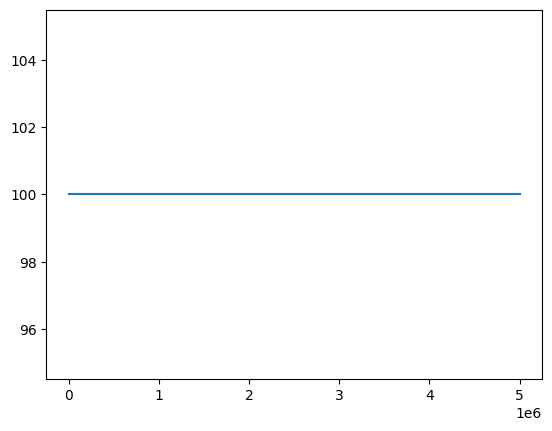

In [ ]:
#exercise 1 Part 4, n=0.3

import numpy as np
import matplotlib.pyplot as plt

def func(x):
    f = (x[0]-1)**2 + x[1]**2 + (x[2]+1)**2
    return f

def gradient(x):
    grad = np.zeros((3,1))

    grad[0][0] = 2*(x[0]-1)
    grad[1][0] = 2*x[1]
    grad[2][0] = 2*(x[2]+1)

    return grad

def norm(grad):
    return np.linalg.norm(grad)

def prox_grad(x0, step_size, reg_para, max_iter_T):
    x = x0
    t = 0
    T = max_iter_T

    while (t<T):
        g = gradient(x)
        y = x - step_size*g

        #now to check for function g
        #if all elements of x are greater than zero, we return g(x) = 0
        #else we set the value for infinit
        #which implies that we would want to keep all of our values of x above zero
        #and avoid making them less than zero
        #hence we write the 'if' statement below

        if (x[0]>=0 and x[1]>=0 and x[2]>=0):
            x = y
            #we write x=y because when we simplify our prox function
            #we notice that g(x) = 0 for x in our closed set
            #and we have to minimise
            #||y-x||^2
            #which only occurs at x = y

            for i in range(3):
                if (x[i]<0):
                    x[i] = 0

             #the above for loop is to make sure x values don't leave
             #the desired convex set

            t = t+1

        else:
            t = t+1

    error = func(x)
    #the optimal value is zero, hence the error is simply equal to the distance of the function from zero

    return x, func(x), error


x0 = np.array([[0],[0],[0]])
n = 0.3
L = 0.5

T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

t = []
e = []

for i in range(len(T)):

    x_min_prox, proximal_min, error_proximal = prox_grad(x0, n, L, T[i])

    print("For max iterations = ", T[i])
    print("The minimiser = ", x_min_prox)
    print("The minima = ", proximal_min)
    print("The error = ", error_proximal)
    print()

    t.append(T[i])
    e.append(error_proximal*100)
    #plot error vs iteration

plt.plot(t,e)



It is clear that using this method, cannot provide you the exact minimiser if the minimiser doesn't belong to the convex set L.

Considering the high learning rate and how close the starting point is to the minimiser in L, we converge rather quickly to our desired value.

Hence, doing so many iterations are pointless, if we reach convergence in a few iterations.

How do we plot level sets for a 3 variable function?

For max iterations =  100
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  500
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  1000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  5000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  10000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  50000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  100000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  500000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  1000000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]
The error =  [1.]

For max iterations =  5000000
The minimiser =  [[1.]
 [0.]
 [0.]]
The minima =  [1.]

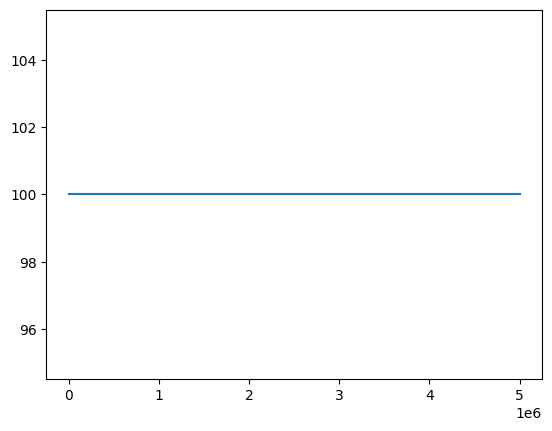

In [ ]:
#exercise 1 Part 4, n=0.7

import numpy as np
import matplotlib.pyplot as plt

def func(x):
    f = (x[0]-1)**2 + x[1]**2 + (x[2]+1)**2
    return f

def gradient(x):
    grad = np.zeros((3,1))

    grad[0][0] = 2*(x[0]-1)
    grad[1][0] = 2*x[1]
    grad[2][0] = 2*(x[2]+1)

    return grad

def norm(grad):
    return np.linalg.norm(grad)

def prox_grad(x0, step_size, reg_para, max_iter_T):
    x = x0
    t = 0
    T = max_iter_T

    while (t<T):
        g = gradient(x)
        y = x - step_size*g

        #now to check for function g
        #if all elements of x are greater than zero, we return g(x) = 0
        #else we set the value for infinit
        #which implies that we would want to keep all of our values of x above zero
        #and avoid making them less than zero
        #hence we write the 'if' statement below

        if (x[0]>=0 and x[1]>=0 and x[2]>=0):
            x = y
            #we write x=y because when we simplify our prox function
            #we notice that g(x) = 0 for x in our closed set
            #and we have to minimise
            #||y-x||^2
            #which only occurs at x = y

            for i in range(3):
                if (x[i]<0):
                    x[i] = 0

             #the above for loop is to make sure x values don't leave
             #the desired convex set

            t = t+1

        else:
            t = t+1

    error = func(x)
    #the optimal value is zero, hence the error is simply equal to the distance of the function from zero

    return x, func(x), error


x0 = np.array([[0],[0],[0]])
n = 0.7
L = 0.5

T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

t = []
e = []

for i in range(len(T)):

    x_min_prox, proximal_min, error_proximal = prox_grad(x0, n, L, T[i])

    print("For max iterations = ", T[i])
    print("The minimiser = ", x_min_prox)
    print("The minima = ", proximal_min)
    print("The error = ", error_proximal)
    print()

    t.append(T[i])
    e.append(error_proximal*100)
    #plot error vs iteration

plt.plot(t,e)



As learning rate is higher, we reach convergence faster for all iterations.

# Exercise 1 Part 5



In [ ]:
#exercise 1 Part 5, n=0.3

import numpy as np
import matplotlib.pyplot as plt
import math as m

def func(x):
    f = 100*(x[1]-x[0]**2)**2 + (0.5-x[0])**2
    return f

def gradient(x):
    grad = np.zeros((2,1))

    grad[0][0] = -400*x[0]*(x[1] - x[0]**2) - 2*(0.5 - x[0])
    grad[1][0] = 200*(x[1] - x[0]**2)

    return grad

def norm(x):
    return m.sqrt(x[0]**2 + x[1]**2)

def prox_grad(x0, step_size, reg_para, max_iter_T):
    x = x0
    t = 0
    T = max_iter_T

    while (t<T):
        g = gradient(x)
        y = x - step_size*g

        #now to check for function g
        #if all elements of x are greater than zero, we return g(x) = 0
        #else we set the value for infinit
        #which implies that we would want to keep all of our values of x above zero
        #and avoid making them less than zero
        #hence we write the 'if' statement below

        if (norm(x) < 1):
            x_new = y
            #we write x=y because when we simplify our prox function
            #we notice that g(x) = 0 for x in our closed set
            #and we have to minimise
            #||y-x||^2
            #which only occurs at x = y

            if(norm(x_new) <= 1):
                x = x_new

            #we check if the new value of x
            #belongs to L
            #if it does, we update x to x_new
            #otherwise we don't update x

            else:
              min = 10000000
              for i in range(-100,100):
                  for j in range(-100,100):
                      diff = 0
                      diff = (m.sqrt((y[0]-i/100)**2 + (y[1] - j/100)**2)) ** 2
                      if (diff<min and m.sqrt((i/100)**2 + (j/100)**2) <= 1): #second condition to make sure we lie in convex set L
                          min = diff
                          x[0] = i/100
                          x[1] = j/100
                    #This portion is to find values of x to satisfy arg min(y-x)^2


            t = t+1

        else:
            t = t+1

    error = func(x)
    #the optimal value is zero, hence the error is simply equal to the distance of the function from zero

    return x, func(x), error


x0 = np.array([[0],[0]])
n = 0.3
L = 0.5

T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

t = []
e = []

for i in range(len(T)):

    x_min_prox, proximal_min, error_proximal = prox_grad(x0, n, L, T[i])

    print("For max iterations = ", T[i])
    print("The minimiser = ", x_min_prox)
    print("The minima = ", proximal_min)
    print("The error = ", error_proximal)
    print()

    t.append(T[i])
    e.append(error_proximal*100)
    #plot error vs iteration

plt.plot(t,e)



For max iterations =  100
The minimiser =  [[0.86]
 [0.51]]
The minima =  [5.401216]
The error =  [5.401216]

For max iterations =  500
The minimiser =  [[0.86]
 [0.51]]
The minima =  [5.401216]
The error =  [5.401216]

For max iterations =  1000
The minimiser =  [[0.86]
 [0.51]]
The minima =  [5.401216]
The error =  [5.401216]



KeyboardInterrupt: 

It is understood from above, that during descent, we end up oscillating between two points from where we cannot escape from.

This is shown from the code below, which only uses 11 iterations to show how the oscillations begin early

In [ ]:
#exercise 1 Part 5 - explanation code

import numpy as np
import matplotlib.pyplot as plt
import math as m

def func(x):
    f = 100*(x[1]-x[0]**2)**2 + (0.5-x[0])**2
    return f

def gradient(x):
    grad = np.zeros((2,1))

    grad[0][0] = -400*x[0]*(x[1] - x[0]**2) - 2*(0.5 - x[0])
    grad[1][0] = 200*(x[1] - x[0]**2)

    return grad

def norm(x):
    return m.sqrt(x[0]**2 + x[1]**2)

def prox_grad(x0, step_size, reg_para, max_iter_T):
    x = x0
    t = 0
    T = max_iter_T

    while (t<T):
        g = gradient(x)
        y = x - step_size*g

        #now to check for function g
        #if all elements of x are greater than zero, we return g(x) = 0
        #else we set the value for infinit
        #which implies that we would want to keep all of our values of x above zero
        #and avoid making them less than zero
        #hence we write the 'if' statement below

        print("For iteration = ", t+1)
        print("x value before updating = ", x)
        if (norm(x) < 1):
            x_new = y
            #we write x=y because when we simplify our prox function
            #we notice that g(x) = 0 for x in our closed set
            #and we have to minimise
            #||y-x||^2
            #which only occurs at x = y

            if(norm(x_new) <= 1):
                x = x_new

            #we check if the new value of x
            #belongs to L
            #if it does, we update x to x_new
            #otherwise we don't update x

            else:
             min = 10000000
             for i in range(-100,100):
                  for j in range(-100,100):
                      diff = 0
                      diff = (m.sqrt((y[0]-i/100)**2 + (y[1] - j/100)**2)) ** 2
                      if (diff<min and m.sqrt((i/100)**2 + (j/100)**2) <= 1): #second condition to make sure we lie in convex set L
                          min = diff
                          x[0] = i/100
                          x[1] = j/100
                    #This portion is to find values of x to satisfy arg min(y-x)^2

            t = t+1



        else:
            t = t+1

        print("y-value for current iteration = ",y)
        print("x-value after updating = ", x)
        print()

    error = func(x)
    #the optimal value is zero, hence the error is simply equal to the distance of the function from zero

    return x, func(x), error


x0 = np.array([[0],[0]])
n = 0.3
L = 0.5

x_min, final, error = prox_grad(x0, n, L, 11)

print("minimiser = ", x_min)
print("optimum value = ", final)



For iteration =  1
x value before updating =  [[0]
 [0]]
y-value for current iteration =  [[0.3]
 [0. ]]
x-value after updating =  [[0.3]
 [0. ]]

For iteration =  2
x value before updating =  [[0.3]
 [0. ]]
y-value for current iteration =  [[-2.82]
 [ 5.4 ]]
x-value after updating =  [[-0.51]
 [ 0.86]]

For iteration =  3
x value before updating =  [[-0.51]
 [ 0.86]]
y-value for current iteration =  [[-36.61788]
 [-35.134  ]]
x-value after updating =  [[-0.75]
 [-0.66]]

For iteration =  4
x value before updating =  [[-0.75]
 [-0.66]]
y-value for current iteration =  [[110.025]
 [ 72.69 ]]
x-value after updating =  [[0.86]
 [0.51]]

For iteration =  5
x value before updating =  [[0.86]
 [0.51]]
y-value for current iteration =  [[-23.05072]
 [ 14.286  ]]
x-value after updating =  [[-0.86]
 [ 0.51]]

For iteration =  6
x value before updating =  [[-0.86]
 [ 0.51]]
y-value for current iteration =  [[23.65072]
 [14.286  ]]
x-value after updating =  [[0.86]
 [0.51]]

For iteration =  7
x v

Also it has been observed that, due to oscillation between two points, doing even number of iterations gives

$(-0.86, 0.51)$

As our minimiser, which returns a large value for our function

Taking odd number of iterations, we get a minimiser of

$(0.86,0.51)$


Regardless of changing the starting point, we end up still oscillating between the two points shown above.

Hence, we can never reach the true minima, being

$(0.5, 0.25)$